In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.random.randint(1,8,20)
data

array([1, 2, 5, 1, 1, 2, 7, 5, 2, 4, 7, 2, 4, 1, 1, 7, 4, 7, 3, 2])

In [4]:
designation = list(map(lambda x: 0 if x<= 4 else 1,data))

In [6]:
designation

[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [7]:
df = pd.DataFrame(data.reshape(-1,1),columns=["Exp"])
df["Dsg"] = designation

In [9]:
df.head()    # 0 - Associate, 1 - Manager

,Exp,Dsg
0,1,0
1,2,0
2,5,1
3,1,0
4,1,0


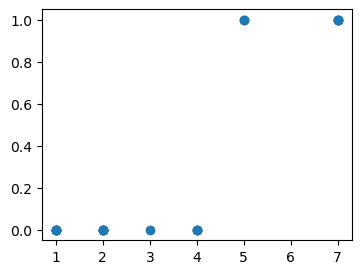

In [10]:
plt.figure(figsize=(4,3))
plt.scatter(df["Exp"], df["Dsg"])
plt.show()

In [11]:
new_exp = np.array([2.5])
new_exp

array([2.5])

In [12]:
k = 3

In [13]:
distances = np.sqrt((new_exp - df["Exp"])**2)
distances

0     1.5
1     0.5
2     2.5
3     1.5
4     1.5
5     0.5
6     4.5
7     2.5
8     0.5
9     1.5
10    4.5
11    0.5
12    1.5
13    1.5
14    1.5
15    4.5
16    1.5
17    4.5
18    0.5
19    0.5
Name: Exp, dtype: float64

In [14]:
sorted(distances)

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 2.5,
 2.5,
 4.5,
 4.5,
 4.5,
 4.5]

In [15]:
new_df = df.copy()
new_df["dist"] = distances

In [16]:
new_df.head()

,Exp,Dsg,dist
0,1,0,1.5
1,2,0,0.5
2,5,1,2.5
3,1,0,1.5
4,1,0,1.5


In [17]:
new_df.sort_values("dist").head(k)

,Exp,Dsg,dist
19,2,0,0.5
1,2,0,0.5
5,2,0,0.5


In [18]:
from sklearn.datasets import make_blobs

In [19]:
data = make_blobs(n_samples=100, n_features=2, centers=[[2,3], [5,6]])

In [20]:
df = pd.DataFrame(data[0], columns=["Col_1", "Col_2"])
df["Target"] = data[1]
df.head()

,Col_1,Col_2,Target
0,4.821739,6.501182,1
1,4.080215,5.757250,1
2,6.347285,5.148646,1
3,1.290476,2.702622,0
4,8.046151,7.088278,1


In [21]:
new_pt = np.array([4.653342, 3.365422])
new_pt

array([4.653342, 3.365422])

In [22]:
X = data[0]
X
y = data[1]

In [23]:
dist = [np.sqrt(((new_pt[0] - X[i][0])**2) + ((new_pt[1] - X[i][1])**2)) for i in range(len(X))]

In [24]:
dist

[3.140278863166343,
 2.4595359415062115,
 2.4595386719739816,
 3.4275602542758468,
 5.036944932325925,
 0.6892342745533313,
 2.1901792879581192,
 1.1983584008295893,
 1.1656762171434814,
 0.4898554436260642,
 2.5710588150648577,
 3.111604567293531,
 3.3159670034919113,
 2.9022091980538898,
 3.6606922884990674,
 2.904055761409911,
 3.092727471667595,
 4.217876958210608,
 3.6458384627457114,
 1.5985078585897057,
 3.4746289609883094,
 3.9118353032050828,
 2.046519939620887,
 2.971780856650312,
 3.5577228502092493,
 4.881416075340248,
 2.4462155647120754,
 4.084744160446424,
 4.155707057604653,
 3.857152332981795,
 1.984764620062977,
 5.120838373027797,
 2.7684391699493154,
 4.3774213781795295,
 3.771923554316784,
 3.664124849359374,
 4.550240229625344,
 3.1791219259526815,
 3.669041729705963,
 3.834908182349285,
 5.424366731193999,
 2.3011985236274977,
 2.828487867589507,
 3.707720352425029,
 2.9943172206881488,
 2.5969144241401727,
 2.180881832340547,
 1.6504698805734062,
 0.726273085869

In [25]:
df["dist"] = dist

In [26]:
df.head()

,Col_1,Col_2,Target,dist
0,4.821739,6.501182,1,3.140279
1,4.080215,5.757250,1,2.459536
2,6.347285,5.148646,1,2.459539
3,1.290476,2.702622,0,3.427560
4,8.046151,7.088278,1,5.036945


In [27]:
df.sort_values("dist").head(5)

,Col_1,Col_2,Target,dist
65,4.355407,3.196190,0,0.342644
9,4.488906,2.903990,0,0.489855
5,4.109657,2.941806,0,0.689234
48,4.116353,3.854417,1,0.726273
8,3.628727,3.921269,0,1.165676


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier(n_neighbors=5)

In [30]:
model.fit(X, y)

KNeighborsClassifier()

In [31]:
model.predict([new_pt])

array([0])